## TITANIC SURVIVAL PROJECT
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split,cross_validate,KFold,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score,confusion_matrix,roc_auc_score
from sklearn import tree
from numpy import mean
from numpy import std
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
Train_set=pd.read_csv('train.csv')
Train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
Test_set=pd.read_csv('test.csv')
Test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df=Train_set.copy()
df1= Test_set.copy()

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df=df.drop(['Cabin','Ticket'],axis=1)
df1=df1.drop(['Cabin','Ticket'],axis=1)

In [9]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df1['Age'].fillna(df1['Age'].median(),inplace=True)
df1['Fare'].fillna(df1['Fare'].mean(),inplace=True)


In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [11]:
df1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

## DATA PREPROCESSING

In [12]:
a=list(df['Name'])
m=[]
for s in a:
    m.append(s.split()[0])
df['Name']=m

In [13]:
b=list(df1['Name'])
n=[]
for s in b:
    n.append(s.split()[0])
df1['Name']=n

In [14]:
import re
def text(text):
    text = re.sub(','," ",text)
    return text

In [15]:
df['Name']=df['Name'].apply(text)
df1['Name']=df1['Name'].apply(text)

In [16]:
cols = ['Name','Sex','Embarked']
for i in cols:
    df[i] = df[i].astype('category')
    df1[i] = df1[i].astype('category')

In [17]:
label_encoder= preprocessing.LabelEncoder()
for j in cols:
    df[j] = label_encoder.fit_transform(df[j])
    df1[j] = label_encoder.fit_transform(df1[j])

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,73,1,22.0,1,0,7.2500,2
1,2,1,1,136,0,38.0,1,0,71.2833,0
2,3,1,3,251,0,26.0,0,0,7.9250,2
3,4,1,1,198,0,35.0,1,0,53.1000,2
4,5,0,3,11,1,35.0,0,0,8.0500,2


In [19]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,172,1,34.5,0,0,7.8292,1
1,893,3,339,0,47.0,1,0,7.0000,2
2,894,2,231,1,62.0,0,0,9.6875,1
3,895,3,344,1,27.0,0,0,8.6625,2
4,896,3,150,0,22.0,1,1,12.2875,2


## MACHINE LEARNING

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

def get_stacking():

    level0 = list()
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    
    
    level1 = LogisticRegression()
    
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=4)
    return model

In [22]:
X = np.array(df.drop(columns='Survived', axis =1))
y= np.array(df['Survived'])
skf = StratifiedKFold(n_splits=3, shuffle=False, random_state=None)



model1 = LogisticRegression()
model2 = DecisionTreeClassifier(max_depth=5)
model3 = RandomForestClassifier()
model4 = AdaBoostClassifier()
model5 = get_stacking()


n_scores1 = cross_val_score(model1, X, y,  cv=skf, n_jobs=-1, error_score='raise')
n_scores2 = cross_val_score(model2, X, y,  cv=skf, n_jobs=-1, error_score='raise')
n_scores3 = cross_val_score(model3, X, y,  cv=skf, n_jobs=-1, error_score='raise')
n_scores4 = cross_val_score(model5, X, y,  cv=skf, n_jobs=-1, error_score='raise')
n_scores5 = cross_val_score(model4, X, y,  cv=skf, n_jobs=-1, error_score='raise')

# report performance
#print(n_scores)
perf1=mean(n_scores1)
perf2=mean(n_scores2)
perf3=mean(n_scores3)
perf4=mean(n_scores5)
perf5=mean(n_scores4)





In [23]:
comparison = pd.DataFrame({'Accuracy':[perf1,perf2,perf3,perf4,perf5]}, index = ['LOGISTICS','DECISIONTREE','RANDOM FOREST','BOOSTING','STACKING'])
comparison

,Accuracy
LOGISTICS,0.769921
DECISIONTREE,0.744108
RANDOM FOREST,0.810325
BOOSTING,0.668911
STACKING,0.709315


In [24]:
a= model3.fit(X, y)

In [25]:
y_pred = a.predict(df1)

In [26]:
Test_set['Survived']=y_pred

In [27]:
Test_set[['PassengerId','Survived']]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Above imported survived data into test table and now merging two tables and checking Accuracy as to know if its showing good Performance or not

In [29]:
df1['Survived']=y_pred

In [30]:
main_df=pd.concat([df,df1],axis=0)

In [31]:
main_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [32]:
X = np.array(main_df.drop(columns='Survived', axis =1))
y= np.array(main_df['Survived'])
skf = StratifiedKFold(n_splits=3, shuffle=False, random_state=None)
scores=['accuracy','f1_weighted']


model1 = LogisticRegression()
model2 = DecisionTreeClassifier(max_depth=5)
model3 = RandomForestClassifier()
model4 = AdaBoostClassifier()
model5 = get_stacking()


n_scores1 = cross_validate(model1, X, y,scoring=scores,  cv=skf, n_jobs=-1, error_score='raise')
n_scores2 = cross_validate(model2, X, y,scoring=scores,  cv=skf, n_jobs=-1, error_score='raise')
n_scores3 = cross_validate(model3, X, y,scoring=scores,  cv=skf, n_jobs=-1, error_score='raise')
n_scores4 = cross_validate(model5, X, y,scoring=scores,  cv=skf, n_jobs=-1, error_score='raise')
n_scores5 = cross_validate(model4, X, y,scoring=scores,  cv=skf, n_jobs=-1, error_score='raise')

# report performance
#print(n_scores)
perf1=mean(n_scores1['test_accuracy'])
perf2=mean(n_scores2['test_accuracy'])
perf3=mean(n_scores3['test_accuracy'])
perf4=mean(n_scores4['test_accuracy'])
perf5=mean(n_scores5['test_accuracy'])

f1=mean(n_scores1['test_f1_weighted'])
f2=mean(n_scores2['test_f1_weighted'])
f3=mean(n_scores3['test_f1_weighted'])
f4=mean(n_scores4['test_f1_weighted'])
f5=mean(n_scores5['test_f1_weighted'])



In [33]:

model1 = LogisticRegression()
model2 = DecisionTreeClassifier(max_depth=5)
model3 = RandomForestClassifier()
model4 = AdaBoostClassifier()
model5 = get_stacking()


n_scores1 = cross_validate(model1, X, y,scoring=scores,  cv=skf, n_jobs=-1,return_train_score=True, error_score='raise')
n_scores2 = cross_validate(model2, X, y,scoring=scores,  cv=skf, n_jobs=-1,return_train_score=True, error_score='raise')
n_scores3 = cross_validate(model3, X, y,scoring=scores,  cv=skf, n_jobs=-1,return_train_score=True, error_score='raise')
n_scores4 = cross_validate(model5, X, y,scoring=scores,  cv=skf, n_jobs=-1,return_train_score=True, error_score='raise')
n_scores5 = cross_validate(model4, X, y,scoring=scores,  cv=skf, n_jobs=-1,return_train_score=True, error_score='raise')

# report performance
#print(n_scores)
erf1=mean(n_scores1['test_accuracy'])
erf2=mean(n_scores2['test_accuracy'])
erf3=mean(n_scores3['test_accuracy'])
erf4=mean(n_scores4['test_accuracy'])
erf5=mean(n_scores5['test_accuracy'])

In [34]:
comparison = pd.DataFrame({'Test_Performance':[perf1,perf2,perf3,perf4,perf5],'Train_Performance':[erf1,erf2,erf3,erf4,erf5],'F1':[f1,f2,f3,f4,f5]}, index = ['LOGISTICS','DECISIONTREE','RANDOM FOREST','BOOSTING','STACKING'])
comparison

,Test_Performance,Train_Performance,F1
LOGISTICS,0.775427,0.775427,0.766192
DECISIONTREE,0.642637,0.644929,0.591056
RANDOM FOREST,0.701495,0.690059,0.670851
BOOSTING,0.715113,0.714356,0.688684
STACKING,0.607501,0.607501,0.515811


### As we imported Survived data in Test Table by Machine learning models and also acheieved good performance that means whatever imputation or prediction we got for survived column is right

## EDA

In [35]:
main_df=pd.concat([Train_set,Test_set],axis=0)

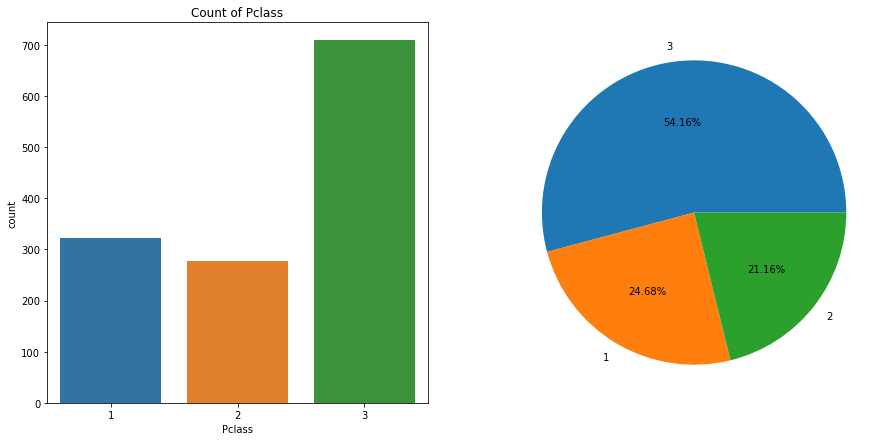

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Pclass")                  
percentage = main_df['Pclass'].value_counts()         
labels = list(main_df['Pclass'].value_counts().index) 

sb.countplot(x = main_df['Pclass'], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### More Number of Passengers are Travelling in Third Class

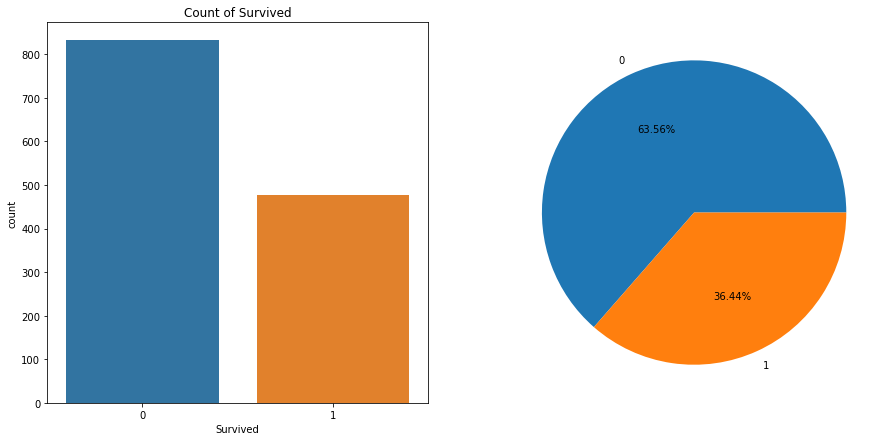

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Survived")                  
percentage = main_df['Survived'].value_counts()         
labels = list(main_df['Survived'].value_counts().index) 

sb.countplot(x = main_df['Survived'], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### Less Number of Passenger Survived

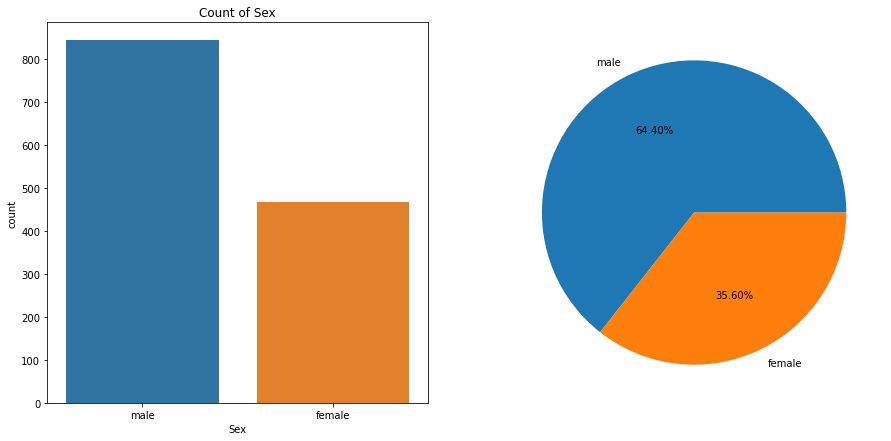

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Sex")                  
percentage = main_df['Sex'].value_counts()         
labels = list(main_df['Sex'].value_counts().index) 

sb.countplot(x = main_df['Sex'], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### MALE Passenger are Higher than FEMALE

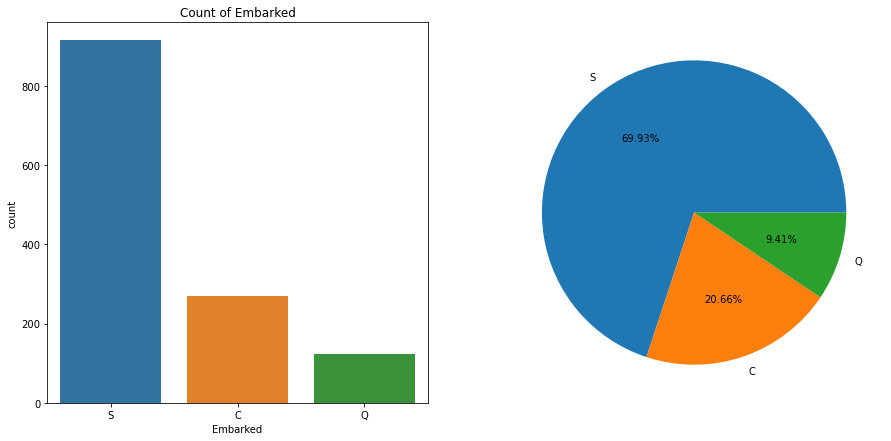

In [39]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Embarked")                  
percentage = main_df['Embarked'].value_counts()         
labels = list(main_df['Embarked'].value_counts().index) 

sb.countplot(x = main_df['Embarked'], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) More are of S = Southampton

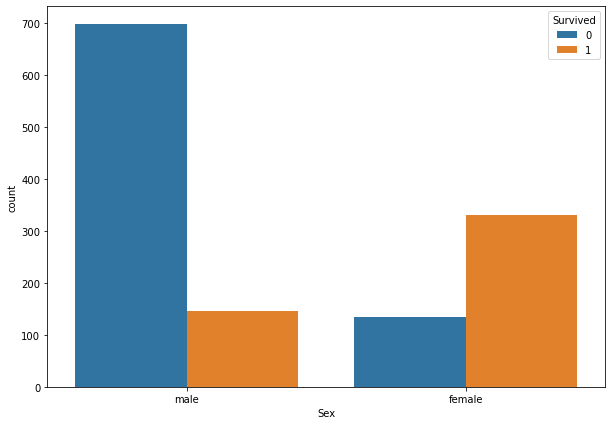

In [40]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "Sex", hue = "Survived", data = main_df)
plt.show()

### FEMALES survived more than MALES

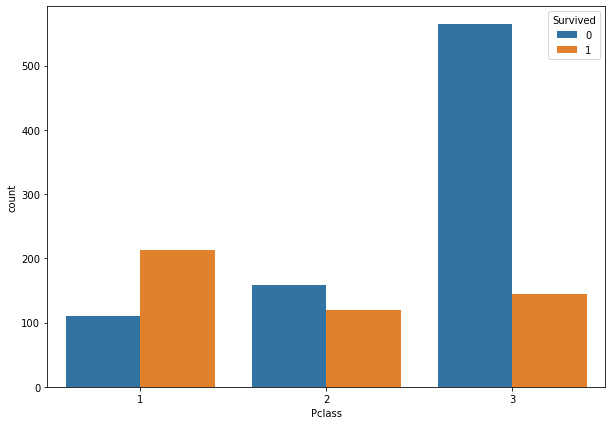

In [41]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "Pclass", hue = "Survived", data = main_df)
plt.show()

### The First Class Passengers Survived more Than other classes

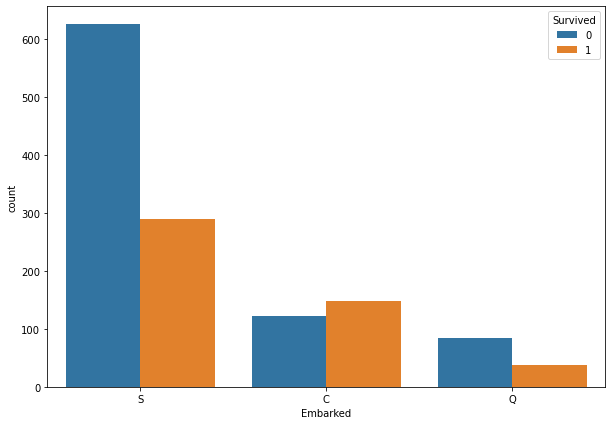

In [42]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "Embarked", hue = "Survived", data = main_df)
plt.show()

### S-PORT Passenger Survived More

In [43]:
main_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

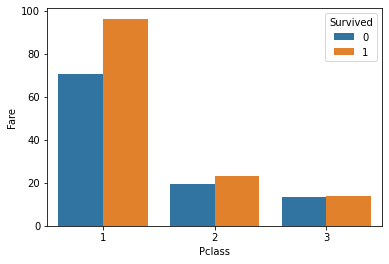

In [44]:
sb.barplot(data = main_df,x = "Pclass", hue = "Survived", y = 'Fare',estimator=np.mean,ci=None)
plt.show()

### High Fare Passengers are Survived

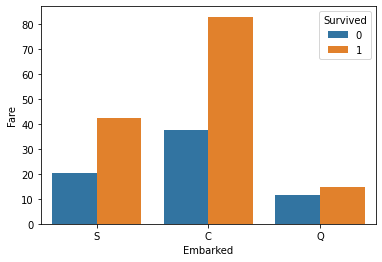

In [45]:
sb.barplot(data = main_df,x = "Embarked", hue = "Survived", y = 'Fare',estimator=np.mean,ci=None)
plt.show()

### C-cat as per fare have survived more

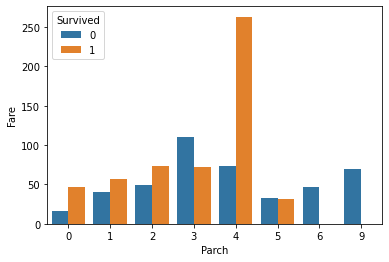

In [46]:
sb.barplot(data = main_df,x = "Parch", hue = "Survived", y = 'Fare',estimator=np.mean,ci=None)
plt.show()

### The Passengers with 6 and 9 Parch are not able to Survive

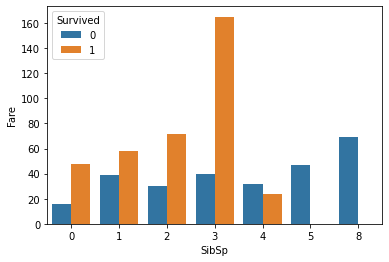

In [47]:
sb.barplot(data = main_df,x = "SibSp", hue = "Survived", y = 'Fare',estimator=np.mean,ci=None)
plt.show()

### The Passengers with 5 and 8 SipSp are not able to Survive

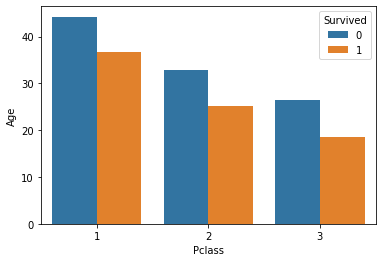

In [48]:
sb.barplot(data = main_df,x = "Pclass", hue = "Survived", y = 'Age',estimator=np.mean,ci=None)
plt.show()

### Conclusions:
1. First Class Passengers were Survived More \
2. Females were Survived More than Males \
3. High Fare Passengers were Survived more \
4. Low Fare were not given any chance to survive \
5. Passengers with 6,9 Parch and 5,8 SipSp were not Survived \
6. NO BARRIER in Age groups

### From analysis and conclusion
Survival is affected by Pclass,Sex and Fare